<a href="https://colab.research.google.com/github/nawaz-kmr/Predicting_customer_churn/blob/main/Predicting_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is customer churn?**

So, customer churn is simply the rate at which customers leave doing business with an entity. Simply put, churn prediction involves determining the possibility of customers stopping doing business with an entity. 
In other words, if a consumer has purchased a subscription to a particular service, we must determine the likelihood that the customer would leave or cancel the membership

In [3]:
# !nvidia-smi

In [4]:
# from google.colab import files

In [5]:
# uploaded = files.upload()

**Predicting customer churn** is critical for telecommunication companies to be able to effectively retain customers. It is more costly to acquire new customers than to retain existing ones. For this reason, large telecommunications corporations are seeking to develop models to predict which customers are more likely to change and take actions accordingly.

In this article, we build a model to predict how likely a customer will churn by analyzing its characteristics: 
**(1) demographic information**, 
**(2) account information, and 
(3) services information.**
The objective is to obtain a data-driven solution that will allow us to reduce churn rates and, as a consequence, to increase customer satisfaction and corporation revenue.



In [1]:
import pandas  as pd

## **1.Data Reading**

The **data set** used in this article is available in the Kaggle (CC BY-NC-ND) and contains **nineteen columns** (independent variables) that indicate the characteristics of the clients of a fictional telecommunications corporation. The **Churn column** (response variable) indicates whether the customer departed within the last month or not. The class No includes the clients that did not leave the company last month, while the class Yes contains the clients that decided to terminate their relations with the company. The objective of the analysis is to obtain the relation between the customer’s characteristics and the churn.

In [2]:
data = pd.read_csv('dataset_tele.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

The data set contains 19 independent variables, which can be classified into 3 groups:

**(1) Demographic Information**

**gender**: Whether the client is a female or a male (Female, Male).
**SeniorCitizen**: Whether the client is a senior citizen or not ( 0, 1).
**Partner**: Whether the client has a partner or not (Yes, No).
**Dependents**: Whether the client has dependents or not (Yes, No).

**(2) Customer Account Information**

**tenure**: Number of months the customer has stayed with the company (Multiple different numeric values).
**Contract**: Indicates the customer’s current contract type (Month-to-Month, One year, Two year).
**PaperlessBilling**: Whether the client has paperless billing or not (Yes, No).
**PaymentMethod**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)).
**MontlyCharges**: The amount charged to the customer monthly (Multiple different numeric values).
**TotalCharges**: The total amount charged to the customer (Multiple different numeric values).

**(3) Services Information**

**PhoneService**: Whether the client has a phone service or not (Yes, No).
**MultipleLines**: Whether the client has multiple lines or not (No phone service, No, Yes).
**InternetServices**: Whether the client is subscribed to Internet service with the company (DSL, Fiber optic, No)
**OnlineSecurity**: Whether the client has online security or not (No internet service, No, Yes).
**OnlineBackup**: Whether the client has online backup or not (No internet service, No, Yes).
**DeviceProtection**: Whether the client has device protection or not (No internet service, No, Yes).
**TechSupport**: Whether the client has tech support or not (No internet service, No, Yes).
**StreamingTV**: Whether the client has streaming TV or not (No internet service, No, Yes).
StreamingMovies: Whether the client has streaming movies or not (No internet service, No, Yes).

## **2. Exploratory Data Analysis and Data Cleaning**

**Exploratory data analysis** consists of analyzing the main characteristics of a data set usually by means of visualization methods and **summary statistics**. The objective is to understand the data, discover patterns and anomalies, and check assumptions before performing further evaluations.

**Missing values and data types**

At the beginning of EDA, we want to know as much information as possible about the data, this is when the pandas.DataFrame.info method comes in handy. This method prints a concise summary of the data frame, including the column names and their data types, the number of non-null values, and the amount of memory used by the data frame.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As shown above, the data set contains **7043 observations** and **21 columns**. Apparently, there are no null values on the data set; however, we observe that the column **TotalCharges** was wrongly detected as an object. This column represents the total amount charged to the customer and it is, therefore, **a numeric variable.** For further analysis, we need to transform this column into a numeric data type. To do so, we can use the **pd.to_numeric** function. By default, this function raises an exception when it sees non-numeric data; however, we can use the argument **errors='coerce'** to skip those cases and replace them with a NaN.

In [5]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

In [6]:
data[data['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


We can now observe that the column TotalCharges has **11** missing values.

These observations have also a **tenure of 0**, even though MontlyCharges is **not null** for these entries. This information appeared to be contradictory, and therefore, we decide to remove those observations from the data set.


In [7]:
data.dropna(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Now we have 7032 entries in the dataset

**Remove customerID column**

The customerID column is useless to explain whether not the customer will churn. Therefore, we drop this column from the data set

In [9]:
data.drop(columns='customerID',inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Payment method denominations**
As shown below, some payment method denominations contain in parenthesis the word **automatic**. These denominations are too long to be used as tick labels in further visualizations. Therefore, we remove this clarification in parenthesis from the entries of the PaymentMethod column.



In [10]:
data.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [11]:
data['PaymentMethod'] = data.PaymentMethod.str.replace(' (automatic)','',regex=False)

In [12]:
data.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

## **3. Data Visualization**


<AxesSubplot:>

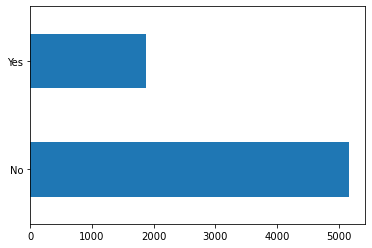

In [13]:
data.Churn.value_counts().plot(kind='barh')

the data set is imbalanced

**Demographic Information**

stacked bar chart for each demographic attribute **(gender, SeniorCitizen, Partner, Dependents)**, showing the percentage of Churn for each category of the attribute.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
x = data.gender.value_counts()
x

Male      3549
Female    3483
Name: gender, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='Count'>

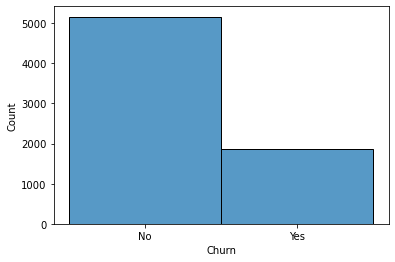

In [16]:
sns.histplot(data.Churn)

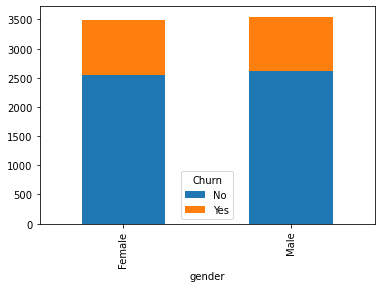

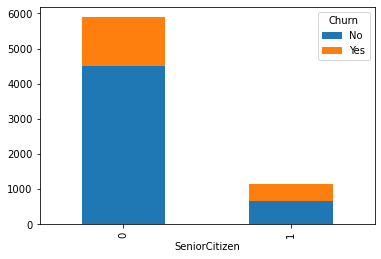

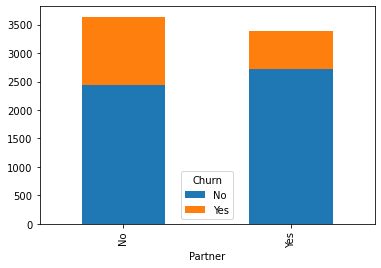

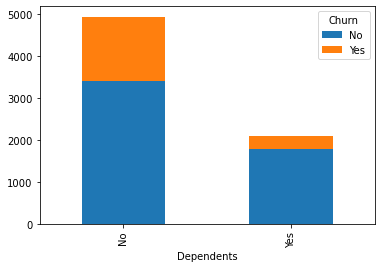

In [17]:
for x in ['gender', 'SeniorCitizen', 'Partner', 'Dependents']:
    pd.crosstab(data[x],data.Churn).plot(kind='bar',stacked=True)

We can extract the following conclusions by analyzing demographic attributes:

The churn rate of senior citizens is almost double that of young citizens.

We do not expect gender to have significant predictive power. A similar percentage of churn is shown both when a customer is a man or a woman.

Customers with a partner churn less than customers with no partner.

Customers with dependents churn less than customers with no dependents.

**Customer Account Information — Categorical variables**

we evaluate the Churn for each category of the customer account attributes (Contract, PaperlessBilling, PaymentMethod).

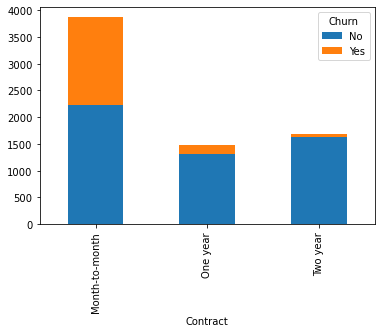

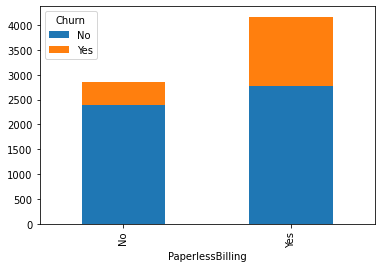

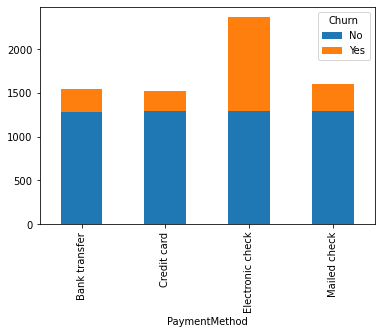

In [18]:
for x in ['Contract', 'PaperlessBilling', 'PaymentMethod']:
  pd.crosstab(data[x],data.Churn).plot(kind='bar',stacked=True)

We can extract the following conclusions by analyzing customer account attributes:

Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts.

Customers who opted for an electronic check as paying method are more likely to leave the company.

Customers subscribed to paperless billing churn more than those who are not subscribed.

**Customer Account Information — Numerical variables**

The following plots show the distribution of tenure, MontlyCharges, TotalCharges by Churn

<AxesSubplot:xlabel='tenure'>

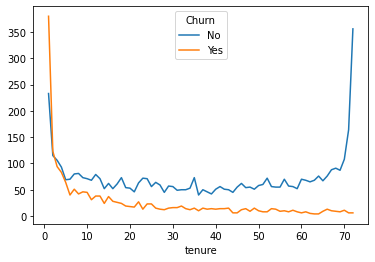

In [19]:
pd.crosstab(data.tenure,data.Churn).plot()

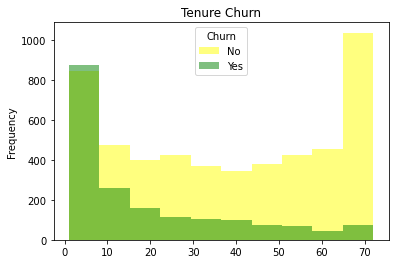

In [20]:
data[data['Churn']=='No']['tenure'].plot(kind = 'hist',alpha=0.5, color = 'yellow',label='No')
data[data['Churn']=='Yes']['tenure'].plot(kind = 'hist',alpha=0.5,color='green', label = 'Yes')
plt.legend(title = 'Churn')
plt.title('Tenure Churn');

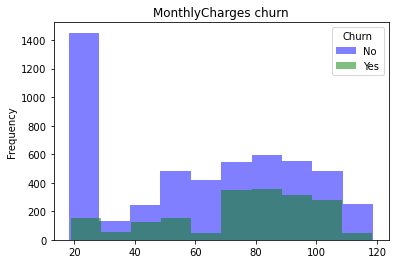

In [21]:
data[data['Churn']=='No']['MonthlyCharges'].plot(kind = 'hist',alpha=0.5, color = 'blue',label='No')
data[data['Churn']=='Yes']['MonthlyCharges'].plot(kind = 'hist',alpha=0.5,color='green', label = 'Yes')
plt.legend(title = 'Churn')
plt.title('MonthlyCharges churn');

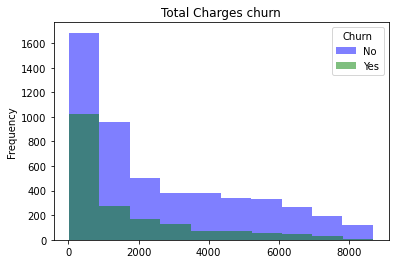

In [22]:
data[data['Churn']=='No']['TotalCharges'].plot(kind = 'hist',alpha=0.5, color = 'blue',label='No')
data[data['Churn']=='Yes']['TotalCharges'].plot(kind = 'hist',alpha=0.5,color='green', label = 'Yes')
plt.legend(title = 'Churn')
plt.title('Total Charges churn');

We can extract the following conclusions by analyzing the histograms above:

The **churn rate** tends to be larger when **monthly charges are high.**

**New customers (low tenure)** are more likely to churn.

Clients with **high total charges** are less likely to leave the company.


**Services Information**

**services_columns** = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

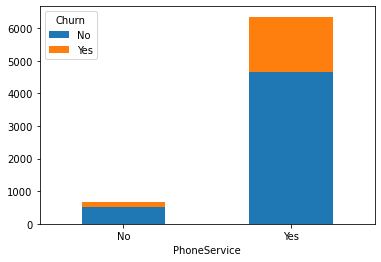

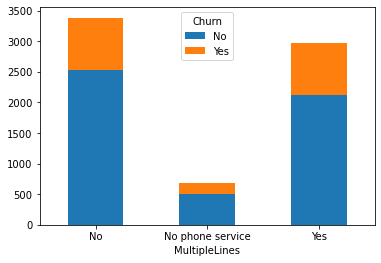

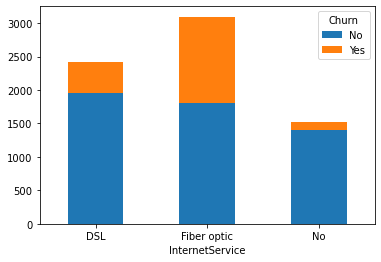

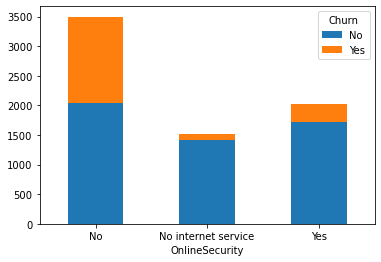

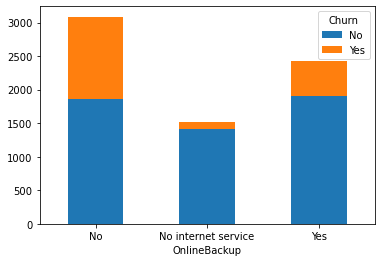

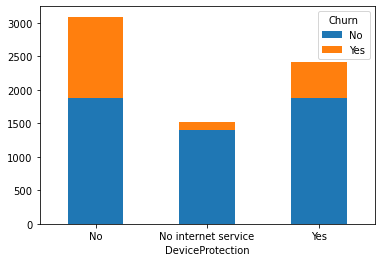

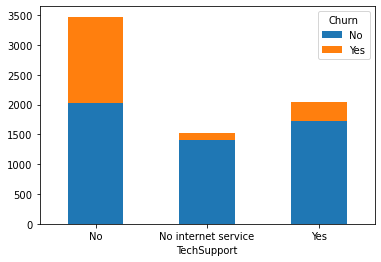

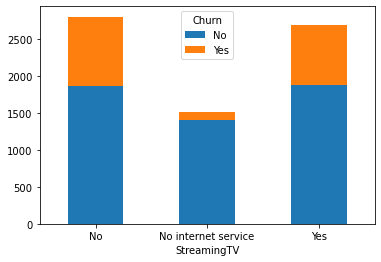

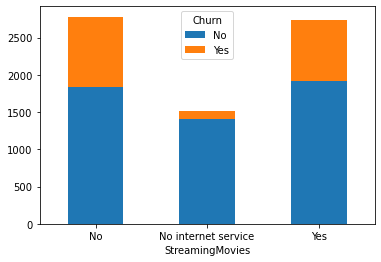

In [23]:
services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for x in services_columns:
  pd.crosstab(data[x],data.Churn).plot(kind='bar',stacked=True)
  plt.xticks(rotation= 360)

We can extract the following conclusions by evaluating **services attributes**:

We do not expect phone attributes (PhoneService and MultipleLines) to have significant predictive power. The percentage of churn for all classes in both independent variables is nearly the same.
Clients with online security churn less than those without it.
Customers with no tech support tend to churn more often than those with tech support.
By looking at the plots above, we can identify the most relevant attributes for detecting churn. We expect these attributes to be discriminative in our future models.



In [24]:
from sklearn.metrics import mutual_info_score

**Mutual information** measures the mutual dependency between two variables based on entropy estimations.

 In machine learning, we are interested in evaluating the degree of dependency between each independent variable and the response variable. Higher values of mutual information show a higher degree of dependency which indicates that the independent variable will be useful for predicting the target.

The **mutual information** extends the notion of **correlation to nonlinear relationships** since, unlike Pearson’s correlation coefficient, this method is able to detect not only linear relationships but also nonlinear ones.

In [25]:
mutual_info_score(data.tenure, data.Churn)

0.07895028043866212

In [26]:
categorical_variables = data.select_dtypes(include=['object','number']).drop('Churn', axis=1)
# data.drop('Churn',axis=1).apply(mutual_info_sc).sort_values(ascending= False)
def compute_mutual_information(cat):
    return mutual_info_score(cat,data.Churn)

In [27]:
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)
feature_importance

TotalCharges        0.537530
MonthlyCharges      0.173835
Contract            0.098182
tenure              0.078950
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
SeniorCitizen       0.010533
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64

<AxesSubplot:>

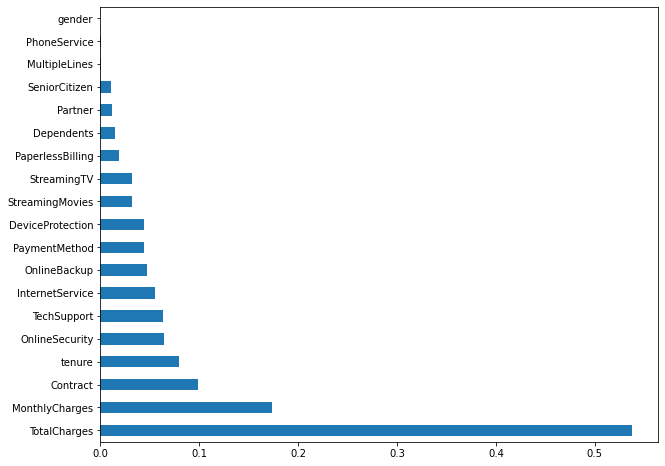

In [28]:
feature_importance.plot(kind='barh',figsize=(10,8))

As shown above, **gender, PhoneService, and MultipleLines** have a mutual information score really close to 0, meaning those variables do not have a strong relationship with the target. This information is in line with the conclusions we have previously drawn by visualizing the data. In the following steps, we should consider removing those variables from the data set before training as they do not provide useful information for predicting the outcome.

# **4. Feature Engineering**

**Feature engineering** is the process of extracting features from the data and transforming them into a format that is suitable for the machine learning model.

In this project, we need to transform both **numerical** and **categorical** variables. Most machine learning algorithms require numerical values; therefore, all categorical attributes available in the dataset should be encoded into numerical labels before training the model. In addition, we need to transform numeric columns into a common scale. This will prevent that the columns with large values dominate the learning process.

In [29]:
data_transformed_full = pd.get_dummies(data.drop('Churn',axis=1))
data_transformed_full.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


One-hot encoding creates a new binary column for each level of the categorical variable. The new column contains zeros and ones indicating the absence or presence of the category in the data

**Normalization**

Data Normalization is a common practice in machine learning which consists of transforming numeric columns to a common scale.

After normalization, all variables have a similar influence on the model, improving the stability and performance of the learning algorithm.

In this project, we will use the **min-max method** to rescale the numeric columns (**tenure, MontlyCharges, and TotalCharges**) to a common scale. The min-max approach (often called **normalization**) rescales the feature to a fixed range of [0,1] by subtracting the minimum value of the feature and then dividing by the range.

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
# data.tenure.plot(kind='kde')
# data.MonthlyCharges.plot(kind='kde')
# data.TotalCharges.plot(kind='kde')
# These variables does not show gussian dist so we use normalization tech

In [31]:
min_max_columns = ['tenure',	'MonthlyCharges',	'TotalCharges']
data_transformed_full[min_max_columns] = MinMaxScaler().fit_transform(data_transformed_full[min_max_columns])
data_transformed_full.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.000000,0.115423,0.001275,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0.464789,0.385075,0.215867,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,0.014085,0.354229,0.010310,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0.619718,0.239303,0.210241,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,0.014085,0.521891,0.015330,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


Now we have all feature in a standard way to train a model but before that we also remove some features having  very low mutual info likes **gender**, **PhoneService**, and **MultipleLines** 

In [32]:
data_remvd = data.drop(columns = ['gender', 'PhoneService', 'MultipleLines'])


In [33]:
#encode and normalize the above dataset
data_remvd_transformed = pd.get_dummies(data_remvd.drop('Churn',axis=1))
min_max_columns = ['tenure',	'MonthlyCharges',	'TotalCharges']
data_remvd_transformed[min_max_columns] = MinMaxScaler().fit_transform(data_remvd_transformed[min_max_columns])
data_remvd_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_DSL,InternetService_Fiber optic,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.000000,0.115423,0.001275,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0.464789,0.385075,0.215867,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,0.014085,0.354229,0.010310,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0.619718,0.239303,0.210241,1,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,0.014085,0.521891,0.015330,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [34]:
churn = data.Churn.map({'No':0,'Yes':1})

In [35]:
churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

# **5. Splitting the data in training and testing sets**


The first step when building a model is to split the data into two groups, which are typically referred to as training and testing sets. 

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data_remvd_transformed, churn,test_size=0.2,random_state=42)

In [38]:
X_train.shape,y_train.shape

((5625, 38), (5625,))

In [39]:
X_test.shape

(1407, 38)

# **6. Assessing multiple algorithms**

Algorithm selection is a key challenge in any machine learning project since there is not an algorithm that is the best across all projects. Generally, we need to evaluate a set of potential candidates and select for further evaluation those that provide better performance.

In [40]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
import xgboost as xgb

In [41]:
def create_models(seed=42):
  modells = []
  modells.append(('dummy_classifier', DummyClassifier(random_state=seed, strategy='most_frequent')))
  modells.append(('k_nearest_neighbors', KNeighborsClassifier()))
  modells.append(('Logestic_Regression', LogisticRegression(random_state=seed)))
  modells.append(('Logestic_Regression', LogisticRegression(random_state=seed,class_weight='balanced')))
  modells.append(('support_vector_machines', SVC(random_state=seed)))
  modells.append(('random_forest', RandomForestClassifier(random_state=seed)))
  modells.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))
  modells.append(('Xgb_classifier', xgb.XGBClassifier(random_state=seed)))
  modells.append(('ExtraTree_classifier', ExtraTreesClassifier(random_state=seed)))
  modells.append(('AdaBoost_classifier', AdaBoostClassifier(random_state=seed)))


  return modells

models = create_models(42)

In [42]:
models

[('dummy_classifier',
  DummyClassifier(random_state=42, strategy='most_frequent')),
 ('k_nearest_neighbors', KNeighborsClassifier()),
 ('Logestic_Regression', LogisticRegression(random_state=42)),
 ('Logestic_Regression',
  LogisticRegression(class_weight='balanced', random_state=42)),
 ('support_vector_machines', SVC(random_state=42)),
 ('random_forest', RandomForestClassifier(random_state=42)),
 ('gradient_boosting', GradientBoostingClassifier(random_state=42)),
 ('Xgb_classifier',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, gamma=None,
                gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max

In [43]:
from sklearn.metrics import accuracy_score
results = []
names = []
for name , model in models:
  model.fit(X_train,y_train)
  prediction = model.predict(X_test)
  accuracy = accuracy_score(y_test,prediction)
  results.append(accuracy)
  names.append(name)
  print('Classifier : {} , Acuuracy : {}'.format(name,accuracy))


Classifier : dummy_classifier , Acuuracy : 0.7341862117981521
Classifier : k_nearest_neighbors , Acuuracy : 0.7356076759061834
Classifier : Logestic_Regression , Acuuracy : 0.7917555081734187
Classifier : Logestic_Regression , Acuuracy : 0.7334754797441365
Classifier : support_vector_machines , Acuuracy : 0.775408670931059
Classifier : random_forest , Acuuracy : 0.7775408670931059
Classifier : gradient_boosting , Acuuracy : 0.7853589196872779
Classifier : Xgb_classifier , Acuuracy : 0.7732764747690121
Classifier : ExtraTree_classifier , Acuuracy : 0.7732764747690121
Classifier : AdaBoost_classifier , Acuuracy : 0.7839374555792467


It is important to bear in mind that we have trained all the algorithms using the default hyperparameters. The accuracy of many machine learning algorithms is highly sensitive to the hyperparameters chosen for training the model.

**Lets do it again by NN**

In [44]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


In [45]:
model = Sequential([
    Dense(128,input_shape=(38,),activation='relu'),
    Dense(256,activation='relu'),
    Dense(256,activation='relu'),
    Dense(32,activation='relu'),
    Dense(38,activation='relu'),
    Dense(1,activation='sigmoid')
])
model.compile(optimizer ='adam',
              loss='binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train,y_train,epochs=50)

Epoch 1/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4433 - accuracy: 0.7812
Epoch 2/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4244 - accuracy: 0.7945
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8041
Epoch 4/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8046
Epoch 5/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8073
Epoch 6/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4062 - accuracy: 0.8087
Epoch 7/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4043 - accuracy: 0.8082
Epoch 8/50
176/176 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8092
Epoch 9/50
176/176 [==============================] - 0s 1ms/step - loss: 0.3945 - accuracy: 0.8130
Epoch 10/50
176/176 [==============================] - 0s 2ms/step - loss: 0.3921 - accuracy: 0.8135

In [46]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 659us/step - loss: 1.0640 - accuracy: 0.7321


[1.0639663934707642, 0.7320539951324463]

In [47]:
y_pred = model.predict(X_test)

In [48]:
y_pred

array([[1.1766504e-08],
       [3.1689548e-01],
       [6.2348217e-01],
       ...,
       [2.0633280e-02],
       [2.4696821e-01],
       [3.4816355e-02]], dtype=float32)

In [49]:
y_pred_list= []
for i in y_pred:
  if i <0.5:
    y_pred_list.append(0)
  else:
    y_pred_list.append(1)


In [50]:
import numpy as np
np.argmax(y_pred,axis=1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
print(classification_report(y_test,y_pred_list))

NameError: name 'classification_report' is not defined

# **7.Hyperparameter tuning**

The selection of hyperparameters consists of testing the performance of the model against different combinations of hyperparameters, selecting those that perform best according to a chosen metric and a validation method.

For **hyperparameter tuning**, we need to split our training data again into a set for training and a set for testing the hyperparameters (often called validation set). It is a very common practice to use **k-fold cross-validation** for hyperparameter tuning. **The training set is divided again into k equal-sized samples,** 1 sample is used for testing and the remaining k-1 samples are used for training the model, repeating the process k times. Then, the k evaluation metrics (in this case the accuracy) are averaged to produce a single estimator.


There are multiple techniques to find the best hyperparameters for a model. The most popular methods are **(1) grid search**, **(2) random search**, and **(3) bayesian optimization**. 

**Grid search **test all combinations of hyperparameters and select the best performing one. It is a really time-consuming method, particularly when the number of hyperparameters and values to try are really high.

In random search, you specify a grid of hyperparameters, and random combinations are selected where each combination of hyperparameters has an equal chance of being sampled. We do not analyze all combinations of hyperparameters, but only random samples of those combinations. This approach is much more computationally efficient than trying all combinations; however, it also has some disadvantages. The main drawback of random search is that not all areas of the grid are evenly covered, especially when the number of combinations selected from the grid is low.

In [52]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

**Hyperparameter tunning for GradientBoosting Classifier**

In [53]:
# params
grid_params = {'n_estimators' : [80, 90, 100, 110, 115, 120],
               'learning_rate':[0.1,0.05,0.5,0.3,0.7,0.06,0.002,0.9,0.005],
               'min_samples_split': [2,3,4,5,6,7,8],
               'max_depth':[2,3,4,5,6,7],
               'max_features':[None, 'auto', 'sqrt', 'log2']
               }
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=grid_params,
                                   n_iter=200,
                                   cv=5,
                                   n_jobs=-1)
random_search.fit(X_train,y_train)


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.05, 0.5, 0.3,
                                                          0.7, 0.06, 0.002, 0.9,
                                                          0.005],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8],
                                        'n_estimators': [80, 90, 100, 110, 115,
                                                         120]})

In [54]:
random_search.best_params_

{'n_estimators': 120,
 'min_samples_split': 7,
 'max_features': 'sqrt',
 'max_depth': 4,
 'learning_rate': 0.06}

# **8.Performace of the model**

The last step of the machine learning process is to check the performance of the model (best hyperparameters ) by using the **confusion matrix** and some evaluation metrics.

Now that the model is trained, it is time to evaluate its performance using the testing set. First, we use the previous model (gradient boosting classifier with best hyperparameters) to predict the class labels of the testing data (with the predict method).

In [55]:
random_search_predict = random_search.predict(X_test)
accuracy_score(y_test,random_search_predict)

0.7931769722814499

In [56]:
from sklearn.metrics import confusion_matrix,classification_report

In [57]:
confusion_matrix(y_test,random_search_predict)

array([[928, 105],
       [186, 188]], dtype=int64)

In [58]:
print(classification_report(y_test,random_search_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



**Drawing conclusions — Summary**

In this project, we have walked through a complete end-to-end machine learning project using the Telco customer Churn dataset. We started by cleaning the data and analyzing it with visualization. Then, to be able to build a machine learning model, we transformed the categorical data into numeric variables (feature engineering). After transforming the data, we tried  different machine learning algorithms using default parameters. Finally, we tuned the hyperparameters of the Gradient Boosting Classifier (best performance model) for model optimization, obtaining an accuracy of nearly 80% (close to 6% higher than the baseline)